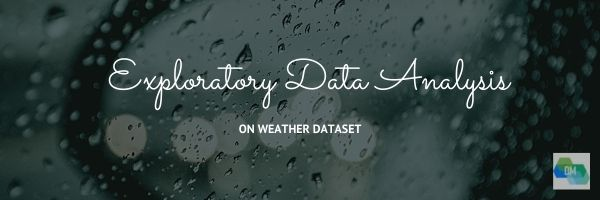

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
# getting started with the model 
# importing required libraries/packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
df_weather= pd.read_csv("../input/weather-dataset/weatherHistory.csv")

In [3]:
df_weather_row_count, df_weather_column_count=df_weather.shape
print('Total number of rows:', df_weather_row_count)
print('Total number of columns:', df_weather_column_count)

Total number of rows: 96453
Total number of columns: 12


### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for datatypes, unique values & missing values✏️ </centre></strong></h3>

In [4]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
print ("Unique values are:\n",df_weather.nunique())

Unique values are:
 Formatted Date              96429
Summary                        27
Precip Type                     2
Temperature (C)              7574
Apparent Temperature (C)     8984
Humidity                       90
Wind Speed (km/h)            2484
Wind Bearing (degrees)        360
Visibility (km)               949
Loud Cover                      1
Pressure (millibars)         4979
Daily Summary                 214
dtype: int64


In [6]:
Summary_Weather=df_weather["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


In [7]:
wt_missing =df_weather.isna().sum()
wt_missing 

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [8]:
t_cells = np.product(df_weather.shape)
t_missing = wt_missing.sum()
percent_missing = (t_missing/t_cells) * 100
print(percent_missing)

0.04466769652922494


In [9]:
df_weather['Precip Type'].fillna(df_weather['Precip Type'].value_counts().index[0],inplace=True)
df_weather.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [10]:
df_weather.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

In [11]:
df_weather.head().iloc[:5]

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [12]:
#checking Datatypes
df_weather.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [13]:
import datetime as dt
from datetime import timedelta

In [14]:
df_weather["Formatted Date"]=pd.to_datetime(df_weather["Formatted Date"])

<AxesSubplot:xlabel='Summary', ylabel='Temperature (C)'>

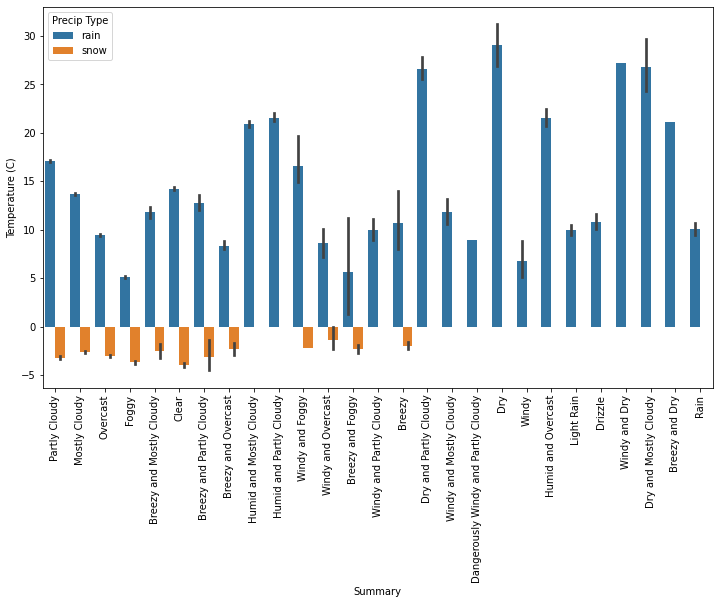

In [15]:
plt.figure(figsize=(12,7))
plt.xticks(rotation=90)
sns.barplot(data=df_weather, x="Summary", y="Temperature (C)",hue="Precip Type")

<AxesSubplot:xlabel='Summary', ylabel='Pressure (millibars)'>

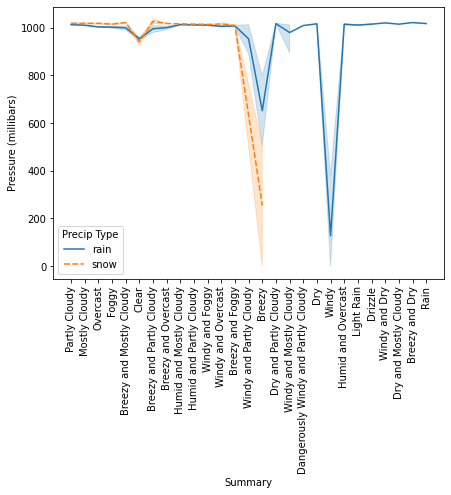

In [16]:
plt.figure(figsize=(7,5))
plt.xticks(rotation=90)
sns.lineplot(data=df_weather, x="Summary", y="Pressure (millibars)", hue="Precip Type", style="Precip Type")

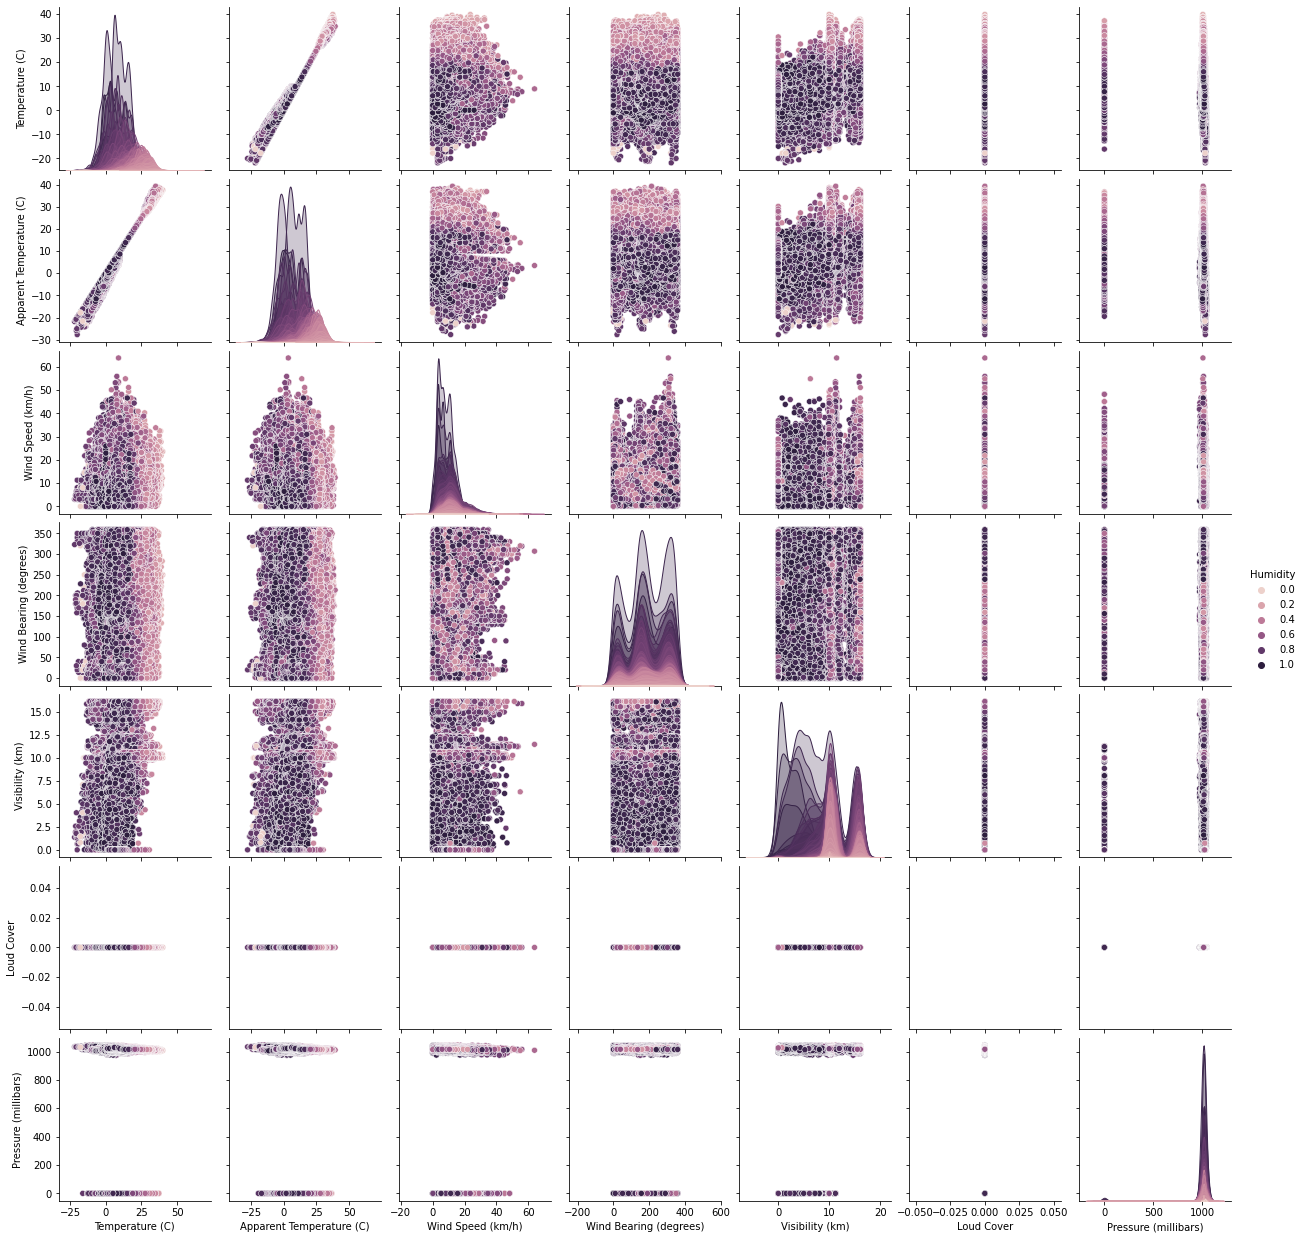

In [17]:
sns.pairplot(df_weather,hue="Humidity")

### <h3 style="background-color:#6c757d;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Creating Weather Dashboard</centre></strong></h3>

<blockquote>⚙️ Install Pywedge using pip command & Import Libraries🔧 </blockquote>

In [18]:
pip install pywedge

Note: you may need to restart the kernel to use updated packages.


In [19]:
import pywedge as pw

In [20]:
x=pw.Pywedge_Charts(df_weather,c=None,y="Humidity")
charts=x.make_charts()

HTML(value='<h2>Pywedge Make_Charts </h2>')

<blockquote>📌 You can generate 8 different plots like Scatter Plot, Pie Chart, Bar Plot, Violin Plot, Box Plot, Distribution Plot, Histogram and Correlation Plot using Pywedge</blockquote>

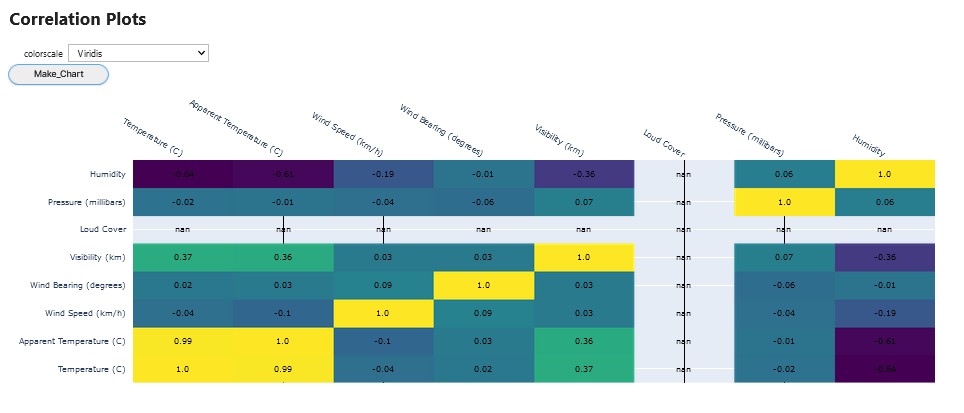

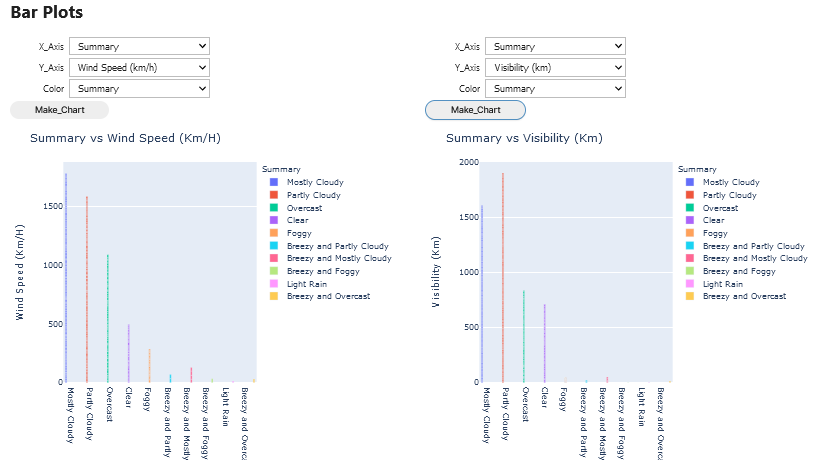

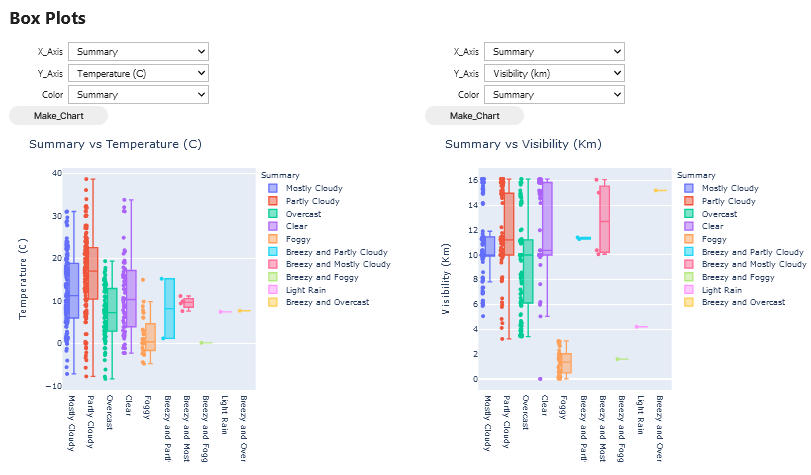

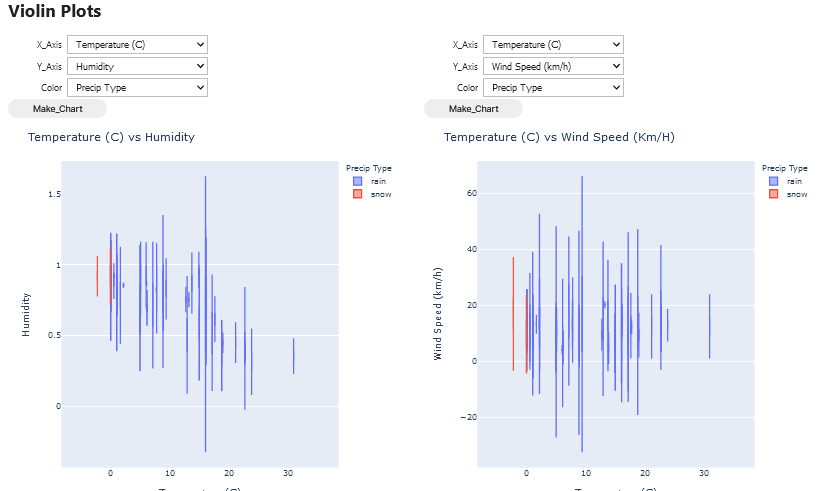

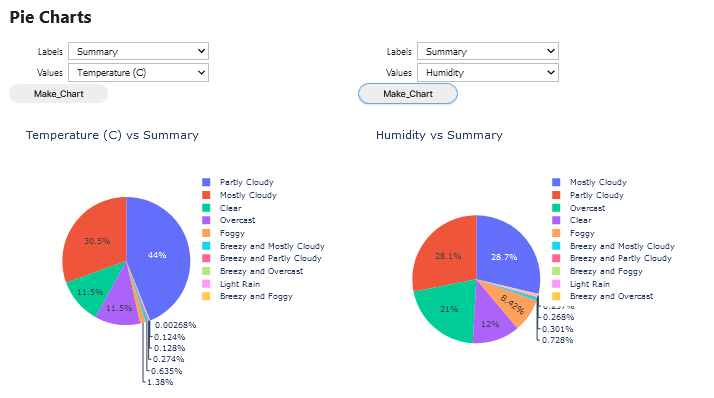

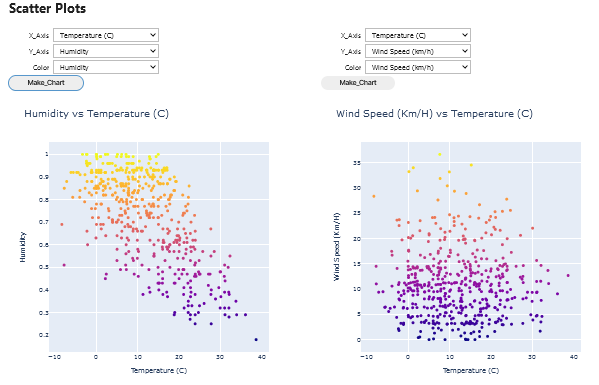